In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [5]:
# Specify data paths
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_new.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_new.tflite'

# Set number of classes

In [6]:
# Change training classes if necessary
NUM_CLASSES = 9

# Dataset reading

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([1595, 1663, 1510,  672,  164,  257,  139,  190,  797], dtype=int64))


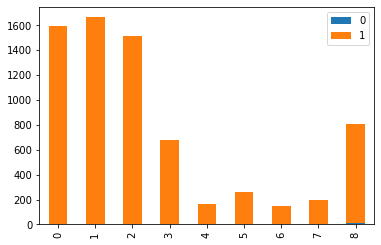

In [10]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [12]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 1

In [13]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [14]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [15]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
82/82 [==============================] - 1s 4ms/step - loss: 1.9356 - accuracy: 0.2229 - val_loss: 1.6331 - val_accuracy: 0.3772

Epoch 00001: val_loss improved from inf to 1.63315, saving model to model/keypoint_classifier\keypoint_classifier_new.hdf5
Epoch 2/1000
82/82 [==============================] - 0s 3ms/step - loss: 1.3901 - accuracy: 0.5071 - val_loss: 1.1731 - val_accuracy: 0.5919

Epoch 00002: val_loss improved from 1.63315 to 1.17310, saving model to model/keypoint_classifier\keypoint_classifier_new.hdf5
Epoch 3/1000
82/82 [==============================] - 0s 3ms/step - loss: 0.9521 - accuracy: 0.6635 - val_loss: 0.7464 - val_accuracy: 0.7699

Epoch 00003: val_loss improved from 1.17310 to 0.74638, saving model to model/keypoint_classifier\keypoint_classifier_new.hdf5
Epoch 4/1000
82/82 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.8246 - val_loss: 0.4610 - val_accuracy: 0.8792

Epoch 00004: val_loss improved from 0.74638 to 0.46

82/82 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9958 - val_loss: 0.0342 - val_accuracy: 0.9903

Epoch 00033: val_loss did not improve from 0.02885
Epoch 34/1000
82/82 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9964 - val_loss: 0.0297 - val_accuracy: 0.9926

Epoch 00034: val_loss did not improve from 0.02885
Epoch 35/1000
82/82 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9969 - val_loss: 0.0279 - val_accuracy: 0.9937

Epoch 00035: val_loss improved from 0.02885 to 0.02794, saving model to model/keypoint_classifier\keypoint_classifier_new.hdf5
Epoch 36/1000
82/82 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9962 - val_loss: 0.0292 - val_accuracy: 0.9926

Epoch 00036: val_loss did not improve from 0.02794
Epoch 37/1000
82/82 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9971 - val_loss: 0.0258 - val_accuracy: 0.9931

Epoch 00037: v


Epoch 00073: val_loss did not improve from 0.02235
Epoch 74/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0256 - val_accuracy: 0.9948

Epoch 00074: val_loss did not improve from 0.02235
Epoch 75/1000
82/82 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0293 - val_accuracy: 0.9937

Epoch 00075: val_loss did not improve from 0.02235
Epoch 76/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.0332 - val_accuracy: 0.9937

Epoch 00076: val_loss did not improve from 0.02235
Epoch 77/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0319 - val_accuracy: 0.9914

Epoch 00077: val_loss did not improve from 0.02235
Epoch 78/1000
82/82 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0286 - val_accuracy: 0.9931

Epoch 00078: val_loss di

In [16]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

28/28 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9954


In [18]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.0125037e-05 3.7938624e-10 9.2264156e-12 8.5561551e-11 2.4634532e-11
 2.2788012e-10 1.0305611e-20 4.9361040e-09 9.9996984e-01]
8


# Confusion matrix

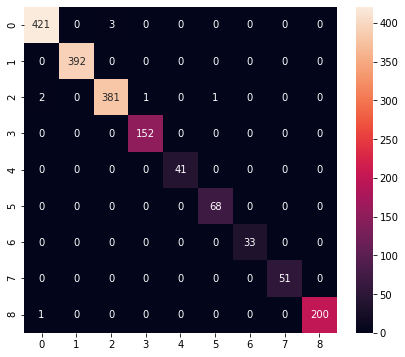

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       424
           1       1.00      1.00      1.00       392
           2       0.99      0.99      0.99       385
           3       0.99      1.00      1.00       152
           4       1.00      1.00      1.00        41
           5       0.99      1.00      0.99        68
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        51
           8       1.00      1.00      1.00       201

    accuracy                           1.00      1747
   macro avg       1.00      1.00      1.00      1747
weighted avg       1.00      1.00      1.00      1747



In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [20]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [21]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\49163\AppData\Local\Temp\tmpb0vctx7k\assets


7760

## Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 117 µs, sys: 7 µs, total: 124 µs
Wall time: 132 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0000000e+00 1.7798680e-13 5.1755124e-26 1.1783223e-18 1.0188586e-18
 1.1212574e-26 2.5901723e-24 2.6419864e-15]
0


## Download model

In [22]:
!zip -r model.zip keypoint_classifier  

        zip warning: name not matched: keypoint_classifier

zip error: Nothing to do! (try: zip -r model.zip . -i keypoint_classifier)




---


# ❗️Hyperparameters Tuning

In [ ]:
%load_ext tensorboard
from tensorboard.plugins.hparams import api as hp

In [ ]:
# Init parameters to tune
HP_NUM_UNITS_1 = hp.HParam('num_units_1', hp.Discrete([16, 32, 64]))
HP_NUM_UNITS_2 = hp.HParam('num_units_2', hp.Discrete([8, 16, 32]))
HP_NUM_UNITS_3 = hp.HParam('num_units_3', hp.Discrete([8, 16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.0, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

In [ ]:
with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS_1,HP_NUM_UNITS_2,HP_NUM_UNITS_3, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=15, verbose=1)

In [ ]:
def train_test_model(hparams):

  model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_1], activation='relu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_2], activation='relu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_3], activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
  
  model.compile(
    optimizer=hparams[HP_OPTIMIZER],
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
  
  cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)

  model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[
               cp_callback,
               es_callback,
               ]
  ) 

  # Load model with best accuracy
  model = tf.keras.models.load_model(model_save_path)

  _, accuracy = model.evaluate(X_test, y_test)
  return accuracy

def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
session_num = 0

for num_units_1 in HP_NUM_UNITS_1.domain.values:
  for num_units_2 in HP_NUM_UNITS_2.domain.values:
    for num_units_3 in HP_NUM_UNITS_3.domain.values:
      for dropout_rate in np.arange(HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value, 0.1):
        for optimizer in HP_OPTIMIZER.domain.values:
          hparams = {
              HP_NUM_UNITS_1: num_units_1,
              HP_NUM_UNITS_2: num_units_2,
              HP_NUM_UNITS_3: num_units_3,
              HP_DROPOUT: dropout_rate,
              HP_OPTIMIZER: optimizer,
          }
          run_name = "run-%d" % session_num
          print('--- Starting trial: %s' % run_name)
          print({h.name: hparams[h] for h in hparams})
          run('logs/hparam_tuning/' + run_name, hparams)
          session_num += 1

In [ ]:
# !ATTENTION! Works only in Colab
%tensorboard --logdir logs/hparam_tuning

In [ ]:
!rm -rf logs